In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skimage.feature import greycomatrix, greycoprops
import pandas as pd

(256, 256, 3)

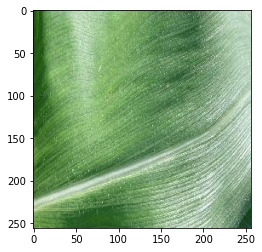

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data/Healthy/Corn_Health (485).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [ ]:
dataFolder = '/content/drive/MyDrive/data/'
folders = os.listdir(dataFolder)
class_dir = {"Blight" : 0, "Common_Rust": 1, "Healthy": 2, "Gray_Leaf_Spot": 3}
images = []
size = (256, 256)
i=0

for folder in folders:
  files = os.listdir(dataFolder + folder)
  for file in files:
   
    imagePath = dataFolder + folder + '/' + file
    # image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(imagePath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, size)
    # image = image.flatten()
    images.append(image)

# images = np.asarray(images)
images=np.array(images)


# pca = PCA(n_components = 256)

# pca.fit(images)
# features = pca.transform(images)
# print(features.shape)

In [ ]:
images.shape

(4188, 256, 256)

In [ ]:
print(images)

[[[ 97  91  99 ... 120 115 115]
  [ 79  81  88 ... 115 115 113]
  [ 67  70  80 ... 115 118 115]
  ...
  [117 114 112 ...  92  64  70]
  [116 117 114 ... 101  65  74]
  [116 121 117 ...  96  68  92]]

 [[134 132 121 ...  86  87  88]
  [130 129 118 ...  84  85  87]
  [129 129 118 ...  82  84  85]
  ...
  [134 131 131 ... 165 170 166]
  [128 126 126 ... 164 170 167]
  [125 125 129 ... 162 170 169]]

 [[159 156 150 ... 228 228 229]
  [160 158 153 ... 228 227 227]
  [161 162 153 ... 228 226 227]
  ...
  [177 180 177 ... 102 111 112]
  [191 187 188 ... 112 117 122]
  [196 182 182 ... 135 139 130]]

 ...

 [[182 173 178 ... 183 169 124]
  [178 170 176 ... 176 166 165]
  [185 180 187 ... 149 155 158]
  ...
  [106 102  98 ... 123 146 210]
  [105 101  97 ... 127 170 210]
  [116 110 103 ... 142 195 191]]

 [[175 155 158 ...  99  96  94]
  [187 193 165 ... 102  96  90]
  [190 172 136 ... 103  95  87]
  ...
  [133 115 160 ...  65  67  63]
  [129 172 133 ...  77  80  73]
  [141 129 110 ...  88  94  

In [ ]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        # GLCM = greycomatrix(img, [1], np.pi/4)#0,pi/4,pi/2,3pi/4,pi,5pi/4,3pi/2,7pi/4       
        # GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        # df['Energy'] = GLCM_Energy
        # GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        # df['Corr'] = GLCM_corr       
        # GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        # df['Diss_sim'] = GLCM_diss       
        # GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        # df['Homogen'] = GLCM_hom       
        # GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        # df['Contrast'] = GLCM_contr

        GLCM2 = greycomatrix(img, [1], [np.pi/4])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [1], [np.pi/2])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [1], [3*np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [1], [np.pi])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6 = greycomatrix(img, [1], [5*np.pi/4])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6 = greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6    
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6

        GLCM7 = greycomatrix(img, [1], [3*np.pi/2])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7      
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7       
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7

        GLCM8 = greycomatrix(img, [1], [7*np.pi/4])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8       
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8

        GLCM9 = greycomatrix(img, [3], [0])       
        GLCM_Energy9 = greycoprops(GLCM9, 'energy')[0]
        df['Energy9'] = GLCM_Energy9
        GLCM_corr9 = greycoprops(GLCM9, 'correlation')[0]
        df['Corr9'] = GLCM_corr9       
        GLCM_diss9 = greycoprops(GLCM9, 'dissimilarity')[0]
        df['Diss_sim9'] = GLCM_diss9       
        GLCM_hom9 = greycoprops(GLCM9, 'homogeneity')[0]
        df['Homogen9'] = GLCM_hom9       
        GLCM_contr9 = greycoprops(GLCM9, 'contrast')[0]
        df['Contrast9'] = GLCM_contr9

        GLCM10 = greycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy10 = greycoprops(GLCM10, 'energy')[0]
        df['Energy10'] = GLCM_Energy10
        GLCM_corr10 = greycoprops(GLCM10, 'correlation')[0]
        df['Corr10'] = GLCM_corr10    
        GLCM_diss10 = greycoprops(GLCM10, 'dissimilarity')[0]
        df['Diss_sim10'] = GLCM_diss10       
        GLCM_hom10 = greycoprops(GLCM10, 'homogeneity')[0]
        df['Homogen10'] = GLCM_hom10       
        GLCM_contr10 = greycoprops(GLCM10, 'contrast')[0]
        df['Contrast10'] = GLCM_contr10

        GLCM11 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy11 = greycoprops(GLCM11, 'energy')[0]
        df['Energy11'] = GLCM_Energy11
        GLCM_corr11 = greycoprops(GLCM11, 'correlation')[0]
        df['Corr11'] = GLCM_corr11   
        GLCM_diss11 = greycoprops(GLCM11, 'dissimilarity')[0]
        df['Diss_sim11'] = GLCM_diss11       
        GLCM_hom11 = greycoprops(GLCM11, 'homogeneity')[0]
        df['Homogen11'] = GLCM_hom11       
        GLCM_contr11 = greycoprops(GLCM11, 'contrast')[0]
        df['Contrast11'] = GLCM_contr11

        GLCM12 = greycomatrix(img, [3], [3*np.pi/4])       
        GLCM_Energy12 = greycoprops(GLCM12, 'energy')[0]
        df['Energy12'] = GLCM_Energy12
        GLCM_corr12 = greycoprops(GLCM12, 'correlation')[0]
        df['Corr12'] = GLCM_corr12       
        GLCM_diss12 = greycoprops(GLCM12, 'dissimilarity')[0]
        df['Diss_sim12'] = GLCM_diss12       
        GLCM_hom12 = greycoprops(GLCM12, 'homogeneity')[0]
        df['Homogen12'] = GLCM_hom12   
        GLCM_contr12 = greycoprops(GLCM12, 'contrast')[0]
        df['Contrast12'] = GLCM_contr12
        
        GLCM13 = greycomatrix(img, [3], [np.pi])       
        GLCM_Energy13 = greycoprops(GLCM13, 'energy')[0]
        df['Energy13'] = GLCM_Energy13
        GLCM_corr13 = greycoprops(GLCM13, 'correlation')[0]
        df['Corr13'] = GLCM_corr13
        GLCM_diss13 = greycoprops(GLCM13, 'dissimilarity')[0]
        df['Diss_sim13'] = GLCM_diss13       
        GLCM_hom13 = greycoprops(GLCM13, 'homogeneity')[0]
        df['Homogen13'] = GLCM_hom13   
        GLCM_contr13 = greycoprops(GLCM13, 'contrast')[0]
        df['Contrast13'] = GLCM_contr13
        
        GLCM14 = greycomatrix(img, [3], [5*np.pi/4])       
        GLCM_Energy14 = greycoprops(GLCM14, 'energy')[0]
        df['Energy14'] = GLCM_Energy14
        GLCM_corr14 = greycoprops(GLCM14, 'correlation')[0]
        df['Corr14'] = GLCM_corr14
        GLCM_diss14 = greycoprops(GLCM14, 'dissimilarity')[0]
        df['Diss_sim14'] = GLCM_diss14       
        GLCM_hom14 = greycoprops(GLCM14, 'homogeneity')[0]
        df['Homogen14'] = GLCM_hom14 
        GLCM_contr14 = greycoprops(GLCM14, 'contrast')[0]
        df['Contrast14'] = GLCM_contr14

        GLCM15 = greycomatrix(img, [3], [3*np.pi/2])       
        GLCM_Energy15 = greycoprops(GLCM15, 'energy')[0]
        df['Energy15'] = GLCM_Energy15
        GLCM_corr15 = greycoprops(GLCM15, 'correlation')[0]
        df['Corr15'] = GLCM_corr15
        GLCM_diss15 = greycoprops(GLCM15, 'dissimilarity')[0]
        df['Diss_sim15'] = GLCM_diss15     
        GLCM_hom15 = greycoprops(GLCM15, 'homogeneity')[0]
        df['Homogen15'] = GLCM_hom15       
        GLCM_contr15 = greycoprops(GLCM15, 'contrast')[0]
        df['Contrast15'] = GLCM_contr15

        GLCM16 = greycomatrix(img, [3], [7*np.pi/4])       
        GLCM_Energy16 = greycoprops(GLCM16, 'energy')[0]
        df['Energy16'] = GLCM_Energy16
        GLCM_corr16 = greycoprops(GLCM16, 'correlation')[0]
        df['Corr16'] = GLCM_corr16
        GLCM_diss16 = greycoprops(GLCM16, 'dissimilarity')[0]
        df['Diss_sim16'] = GLCM_diss16     
        GLCM_hom16 = greycoprops(GLCM16, 'homogeneity')[0]
        df['Homogen16'] = GLCM_hom16 
        GLCM_contr16 = greycoprops(GLCM16, 'contrast')[0]
        df['Contrast16'] = GLCM_contr16

        GLCM17 = greycomatrix(img, [5], [0])       
        GLCM_Energy17 = greycoprops(GLCM17, 'energy')[0]
        df['Energy17'] = GLCM_Energy17
        GLCM_corr17 = greycoprops(GLCM17, 'correlation')[0]
        df['Corr17'] = GLCM_corr17 
        GLCM_diss17 = greycoprops(GLCM17, 'dissimilarity')[0]
        df['Diss_sim17'] = GLCM_diss17       
        GLCM_hom17 = greycoprops(GLCM17, 'homogeneity')[0]
        df['Homogen17'] = GLCM_hom17   
        GLCM_contr17 = greycoprops(GLCM17, 'contrast')[0]
        df['Contrast17'] = GLCM_contr17

        GLCM18 = greycomatrix(img, [5], [np.pi/4])       
        GLCM_Energy18 = greycoprops(GLCM18, 'energy')[0]
        df['Energy18'] = GLCM_Energy18
        GLCM_corr18 = greycoprops(GLCM18, 'correlation')[0]
        df['Corr18'] = GLCM_corr18
        GLCM_diss18 = greycoprops(GLCM18, 'dissimilarity')[0]
        df['Diss_sim18'] = GLCM_diss18     
        GLCM_hom18 = greycoprops(GLCM18, 'homogeneity')[0]
        df['Homogen18'] = GLCM_hom18 
        GLCM_contr18 = greycoprops(GLCM18, 'contrast')[0]
        df['Contrast18'] = GLCM_contr18

        
        GLCM19 = greycomatrix(img, [5], [3*np.pi/4])       
        GLCM_Energy19 = greycoprops(GLCM19, 'energy')[0]
        df['Energy19'] = GLCM_Energy19
        GLCM_corr19 = greycoprops(GLCM19, 'correlation')[0]
        df['Corr19'] = GLCM_corr19
        GLCM_diss19 = greycoprops(GLCM19, 'dissimilarity')[0]
        df['Diss_sim19'] = GLCM_diss19       
        GLCM_hom19 = greycoprops(GLCM19, 'homogeneity')[0]
        df['Homogen19'] = GLCM_hom19   
        GLCM_contr19 = greycoprops(GLCM19, 'contrast')[0]
        df['Contrast19'] = GLCM_contr19
        
        GLCM20 = greycomatrix(img, [5], [np.pi])       
        GLCM_Energy20 = greycoprops(GLCM20, 'energy')[0]
        df['Energy20'] = GLCM_Energy20
        GLCM_corr20 = greycoprops(GLCM20, 'correlation')[0]
        df['Corr20'] = GLCM_corr20
        GLCM_diss20 = greycoprops(GLCM20, 'dissimilarity')[0]
        df['Diss_sim20'] = GLCM_diss20     
        GLCM_hom20 = greycoprops(GLCM20, 'homogeneity')[0]
        df['Homogen20'] = GLCM_hom20 
        GLCM_contr20 = greycoprops(GLCM20, 'contrast')[0]
        df['Contrast20'] = GLCM_contr20
        
        GLCM21 = greycomatrix(img, [5], [5*np.pi/4])       
        GLCM_Energy21 = greycoprops(GLCM21, 'energy')[0]
        df['Energy21'] = GLCM_Energy21
        GLCM_corr21 = greycoprops(GLCM21, 'correlation')[0]
        df['Corr21'] = GLCM_corr21
        GLCM_diss21 = greycoprops(GLCM21, 'dissimilarity')[0]
        df['Diss_sim21'] = GLCM_diss21     
        GLCM_hom21 = greycoprops(GLCM21, 'homogeneity')[0]
        df['Homogen21'] = GLCM_hom21 
        GLCM_contr21 = greycoprops(GLCM21, 'contrast')[0]
        df['Contrast21'] = GLCM_contr21

        GLCM22 = greycomatrix(img, [5], [3*np.pi/2])       
        GLCM_Energy22 = greycoprops(GLCM22, 'energy')[0]
        df['Energy22'] = GLCM_Energy22
        GLCM_corr22 = greycoprops(GLCM22, 'correlation')[0]
        df['Corr22'] = GLCM_corr22
        GLCM_diss22 = greycoprops(GLCM22, 'dissimilarity')[0]
        df['Diss_sim22'] = GLCM_diss22     
        GLCM_hom22 = greycoprops(GLCM22, 'homogeneity')[0]
        df['Homogen22'] = GLCM_hom22 
        GLCM_contr22 = greycoprops(GLCM22, 'contrast')[0]
        df['Contrast22'] = GLCM_contr22

        GLCM23 = greycomatrix(img, [5], [7*np.pi/4])       
        GLCM_Energy23 = greycoprops(GLCM23, 'energy')[0]
        df['Energy23'] = GLCM_Energy23
        GLCM_corr23 = greycoprops(GLCM23, 'correlation')[0]
        df['Corr23'] = GLCM_corr23  
        GLCM_diss23 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim23'] = GLCM_diss23     
        GLCM_hom23 = greycoprops(GLCM23, 'homogeneity')[0]
        df['Homogen23'] = GLCM_hom23   
        GLCM_contr23 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast23'] = GLCM_contr23

        GLCM24 = greycomatrix(img, [5], [np.pi/2])       
        GLCM_Energy24 = greycoprops(GLCM24, 'energy')[0]
        df['Energy24'] = GLCM_Energy24
        GLCM_corr24 = greycoprops(GLCM24, 'correlation')[0]
        df['Corr24'] = GLCM_corr24
        GLCM_diss24 = greycoprops(GLCM24, 'dissimilarity')[0]
        df['Diss_sim24'] = GLCM_diss24    
        GLCM_hom24 = greycoprops(GLCM24, 'homogeneity')[0]
        df['Homogen24'] = GLCM_hom24
        GLCM_contr24 = greycoprops(GLCM24, 'contrast')[0]
        df['Contrast24'] = GLCM_contr24

        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [ ]:
images.shape

(4188, 256, 256)

In [ ]:
image_features = feature_extractor(images)

X_for_ML =image_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:273: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:275: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [ ]:
print(type(images))

<class 'numpy.ndarray'>


In [ ]:
print(images)

[array([97, 91, 99, ..., 96, 68, 92], dtype=uint8), array([134, 132, 121, ..., 162, 170, 169], dtype=uint8), array([159, 156, 150, ..., 135, 139, 130], dtype=uint8), array([207, 200, 204, ..., 127, 109, 112], dtype=uint8), array([222, 221, 220, ...,  47,  45,  47], dtype=uint8), array([124, 128, 134, ..., 120, 119, 118], dtype=uint8), array([129, 108,  89, ..., 110, 107, 105], dtype=uint8), array([ 98, 102, 102, ...,  70,  63,  73], dtype=uint8), array([185, 198, 181, ..., 163, 155, 162], dtype=uint8), array([166, 157, 165, ..., 152, 158, 205], dtype=uint8), array([37, 39, 40, ..., 30, 33, 34], dtype=uint8), array([ 12,  10,  11, ..., 118, 121, 110], dtype=uint8), array([49, 54, 64, ..., 30, 32, 28], dtype=uint8), array([213, 205, 200, ..., 168, 191, 215], dtype=uint8), array([ 17,  17,  21, ..., 123, 128, 133], dtype=uint8), array([ 82,  79,  82, ..., 118, 111, 111], dtype=uint8), array([ 95, 102, 105, ..., 116, 113, 112], dtype=uint8), array([111, 108, 104, ..., 126, 128, 131], dtype

In [ ]:
print(len(images))

4188


In [ ]:
print(len(images[0]))

65536


In [ ]:
print(type(images))

<class 'numpy.ndarray'>


In [ ]:
print(images)

[[ 97.  91.  99. ...  96.  68.  92.]
 [134. 132. 121. ... 162. 170. 169.]
 [159. 156. 150. ... 135. 139. 130.]
 ...
 [182. 173. 178. ... 142. 195. 191.]
 [175. 155. 158. ...  88.  94.  86.]
 [119. 111. 114. ... 151. 144. 145.]]


In [ ]:
print(images.shape)

(4188, 65536)


In [ ]:
type(features)

numpy.ndarray

In [ ]:
print(features.shape)

(4188, 256)


In [ ]:
print(features)

[[ 5.46453082e+03  2.10640672e+03 -3.10556143e+02 ... -3.39639640e+01
   5.01600366e+02 -1.19221372e+02]
 [ 6.59135096e+03 -2.29453270e+03 -5.27515392e+02 ... -1.72193545e+02
  -9.00201274e+00 -4.10980149e+01]
 [ 3.90746814e+03 -2.76703854e+03  1.39892817e+03 ... -1.42654313e+02
   1.11179508e+02  1.91240084e+02]
 ...
 [ 4.70034826e+03  6.29231669e+02  3.83302808e+03 ... -4.88649024e+00
   6.19193103e+01 -2.46094326e+01]
 [ 6.14653412e+03  4.42415052e+03 -2.44217627e+03 ... -1.47606215e+02
  -1.92354100e+02 -2.83206173e+01]
 [ 5.32837840e+03  1.76144881e+01 -6.85861679e+02 ... -9.53635650e+00
   2.32677081e+02 -5.42183023e+02]]


In [ ]:
category = []
for folder in folders:
  files = os.listdir(dataFolder + folder)
  for file in files:
    imagePath = dataFolder + folder + '/' + file
    category.append(class_dir[folder])

category = np.asarray(category, dtype='int')
print(category)
category = np.reshape(category, (category.shape[0], 1))
print(category.shape)

[0 0 0 ... 2 2 2]
(4188, 1)


In [ ]:
print(category)

[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]


In [ ]:
df = pd.DataFrame()
df.head()

""


In [ ]:
df['category'] = category
df.head()

In [ ]:
# X = df
y = category
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_for_ML, y, test_size=0.33, stratify=y)

In [ ]:
svc = SVC()
rfc = RandomForestClassifier()
# knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
error_rate = []# Will take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Error Rate')

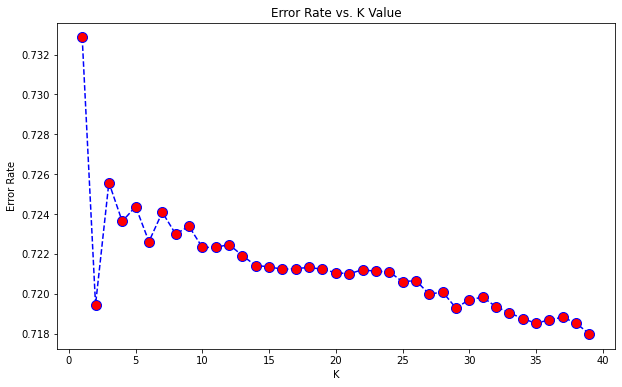

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(knn.score(X_train,y_train))
print(classification_report(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.720855614973262
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       378
           1       0.74      0.94      0.83       431
           2       0.87      0.61      0.71       384
           3       0.55      0.22      0.31       190

    accuracy                           0.70      1383
   macro avg       0.69      0.63      0.63      1383
weighted avg       0.71      0.70      0.68      1383



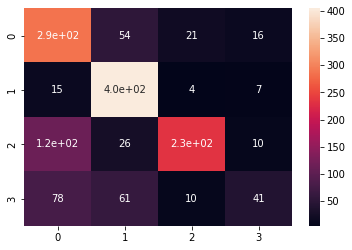

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# train_glcm = sc.fit_transform(train_glcm)
# test_glcm = sc.transform(test_glcm)

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA()
# train_glcm = pca.fit_transform(train_glcm)
# test_glcm= pca.transform(test_glcm)

In [ ]:
# explained_variance = pca.explained_variance_ratio_

In [ ]:
# explained_variance

array([4.65056937e-01, 3.69824828e-01, 8.04572003e-02, 2.83395925e-02,
       1.95338737e-02, 1.09340392e-02, 9.23105827e-03, 2.83567835e-03,
       2.17387311e-03, 1.86843112e-03, 1.76591416e-03, 1.51243935e-03,
       1.23378160e-03, 1.02744277e-03, 7.59662300e-04, 6.24986311e-04,
       6.10044383e-04, 2.78282582e-04, 2.67591946e-04, 2.02867944e-04,
       1.83027316e-04, 1.68878100e-04, 1.54251481e-04, 1.39237094e-04,
       1.26260437e-04, 1.10353439e-04, 1.06459086e-04, 8.76560097e-05,
       6.94208477e-05, 6.09553576e-05, 4.04383964e-05, 3.62405961e-05,
       2.31656189e-05, 2.16991408e-05, 1.90204224e-05, 1.81188393e-05,
       1.73439347e-05, 1.31627598e-05, 1.16336076e-05, 8.54287879e-06,
       7.63756309e-06, 7.09784877e-06, 5.87006256e-06, 5.66515918e-06,
       4.79090181e-06, 4.15729062e-06, 2.74576666e-06, 2.19164149e-06,
       1.68867175e-06, 1.07797995e-06, 7.76796665e-07, 6.43520773e-07,
       4.54725070e-07, 4.33047854e-07, 1.91561725e-07, 6.65360809e-08,
      

In [ ]:
# pca = PCA(n_components=1)
# train_glcm = pca.fit_transform(train_glcm)
# test_glcm = pca.transform(test_glcm)

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn import *

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

In [ ]:
# pca = PCA(n_components=2)
# train_glcm = pca.fit_transform(train_glcm)
# test_glcm = pca.transform(test_glcm)

In [ ]:
for i in range(1,10):
  clf = svm.SVC(kernel='poly',degree = i )
  clf.fit(X_train, y_train) 
  yhat = clf.predict(X_test)
  print(yhat)

  print(metrics.accuracy_score(y_test, yhat))
  print(confusion_matrix(y_test, yhat))
  print(classification_report(y_test, yhat))

In [ ]:
clf = svm.SVC(kernel='rbf',gamma = 'scale')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

In [ ]:
clf = svm.SVC(kernel='rbf',gamma = 'auto')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

In [ ]:
# svc = SVC()
svc = SVC(kernel='linear')

In [ ]:
svc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
# knn.fit(X_train,y_train)

In [ ]:
svc.score(X_test,y_test)

0.7245119305856833

In [ ]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1, 2, 3]))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       378
           1       0.81      0.95      0.87       431
           2       0.84      0.65      0.73       384
           3       0.75      0.31      0.43       190

    accuracy                           0.72      1383
   macro avg       0.74      0.66      0.67      1383
weighted avg       0.74      0.72      0.71      1383



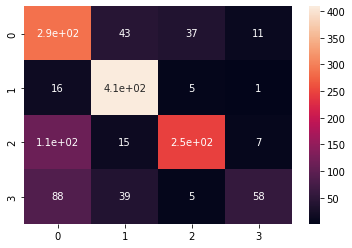

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train) 
yhat = rfc.predict(X_test)
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[1 0 0 ... 1 0 1]
0.8062183658712943
[[301   6  30  41]
 [ 21 399   4   7]
 [ 46   0 329   9]
 [ 90   1  13  86]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       378
           1       0.98      0.93      0.95       431
           2       0.88      0.86      0.87       384
           3       0.60      0.45      0.52       190

    accuracy                           0.81      1383
   macro avg       0.78      0.76      0.76      1383
weighted avg       0.81      0.81      0.81      1383



In [ ]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1, 2, 3]))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       378
           1       0.99      0.91      0.95       431
           2       0.86      0.90      0.88       384
           3       0.68      0.57      0.62       190

    accuracy                           0.83      1383
   macro avg       0.81      0.79      0.80      1383
weighted avg       0.83      0.83      0.83      1383



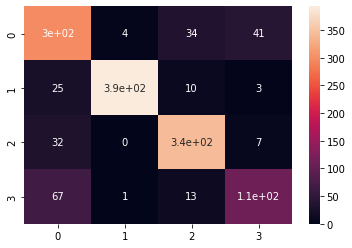

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)